<a href="https://colab.research.google.com/github/graciemwilliams/linearModels/blob/main/lab_notebook_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the airbnb_hw.csv data from computer
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('airbnb_hw.csv')

Saving airbnb_hw.csv to airbnb_hw (3).csv


In [4]:
# see all of the columns of df
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [5]:
# see what type of value all of the columns are
df.dtypes

,0
Host Id,int64
Host Since,object
Name,object
Neighbourhood,object
Property Type,object
Review Scores Rating (bin),float64
Room Type,object
Zipcode,float64
Beds,float64
Number of Records,int64


# 1. Clean the data and perform some EDA and visualization to get to know the data set.

Neighbourhood 
Manhattan        11692
Brooklyn          8430
Queens            1576
Bronx              215
Staten Island       94
Name: count, dtype: int64


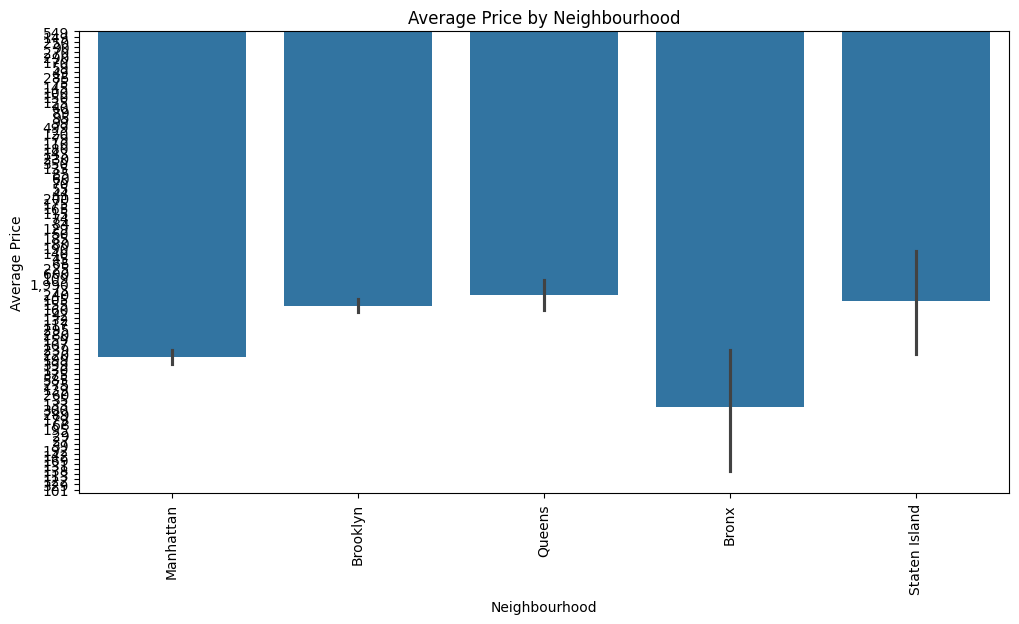

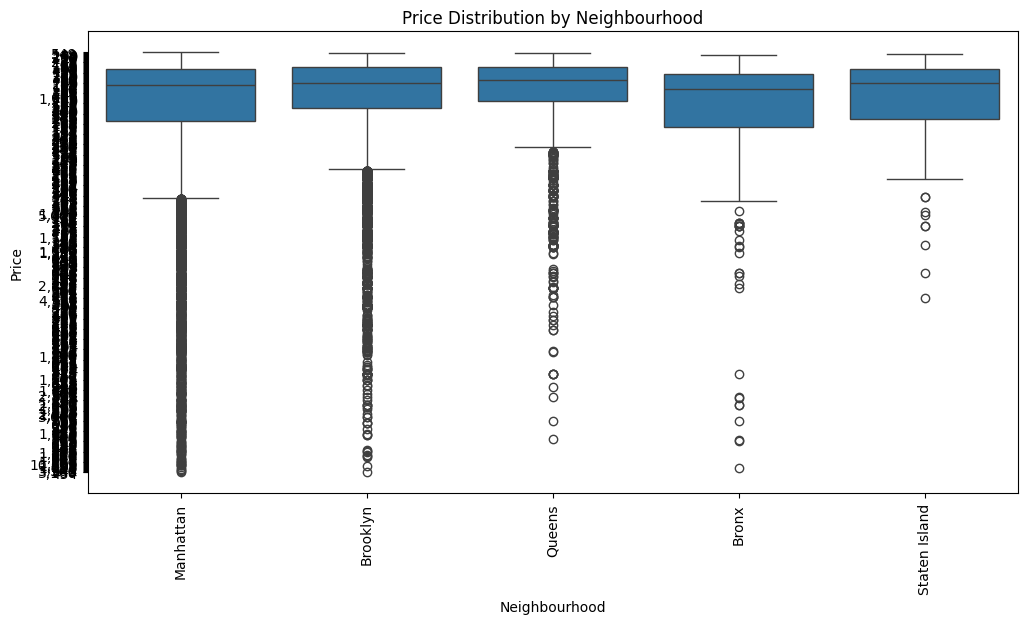

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('airbnb_hw.csv')

# Clean the data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Perform EDA on Neighbourhood
print(df['Neighbourhood '].value_counts())

# Visualization of average price by neighbourhood
plt.figure(figsize=(12, 6))
sns.barplot(x='Neighbourhood ', y='Price', data=df, estimator='mean')
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# Visualization of price distribution by neighbourhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighbourhood ', y='Price', data=df)
plt.title('Price Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


            Host Id  Review Scores Rating (bin)       Zipcode          Beds  \
count  2.200700e+04                22007.000000  22007.000000  22007.000000   
mean   1.104610e+07                   90.732949  10575.311037      1.556687   
std    1.079848e+07                    9.069640    597.741247      1.043301   
min    5.000000e+02                   20.000000   7105.000000      0.000000   
25%    2.241260e+06                   85.000000  10016.000000      1.000000   
50%    6.900870e+06                   90.000000  10044.000000      1.000000   
75%    1.808596e+07                  100.000000  11216.000000      2.000000   
max    4.272660e+07                  100.000000  11694.000000     16.000000   

       Number of Records  Number Of Reviews  Review Scores Rating  
count            22007.0       22007.000000          22007.000000  
mean                 1.0          16.461490             91.987731  
std                  0.0          24.231379              8.860796  
min             

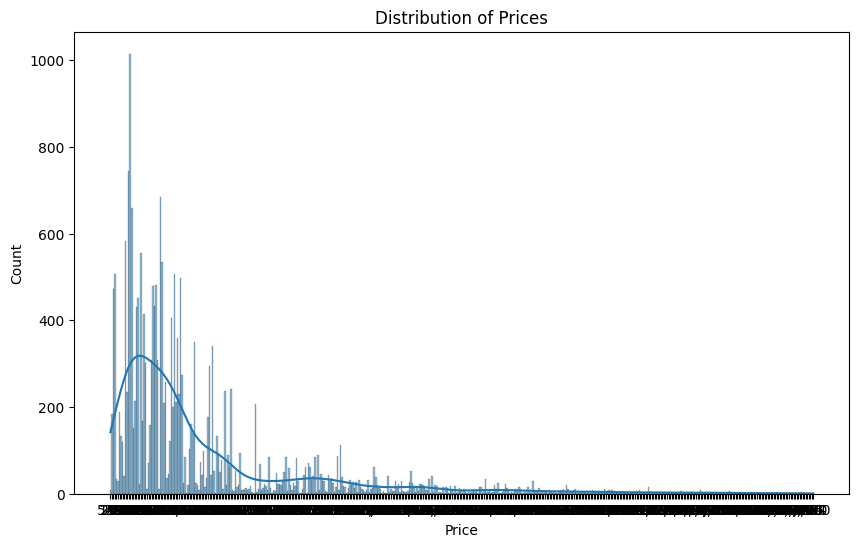

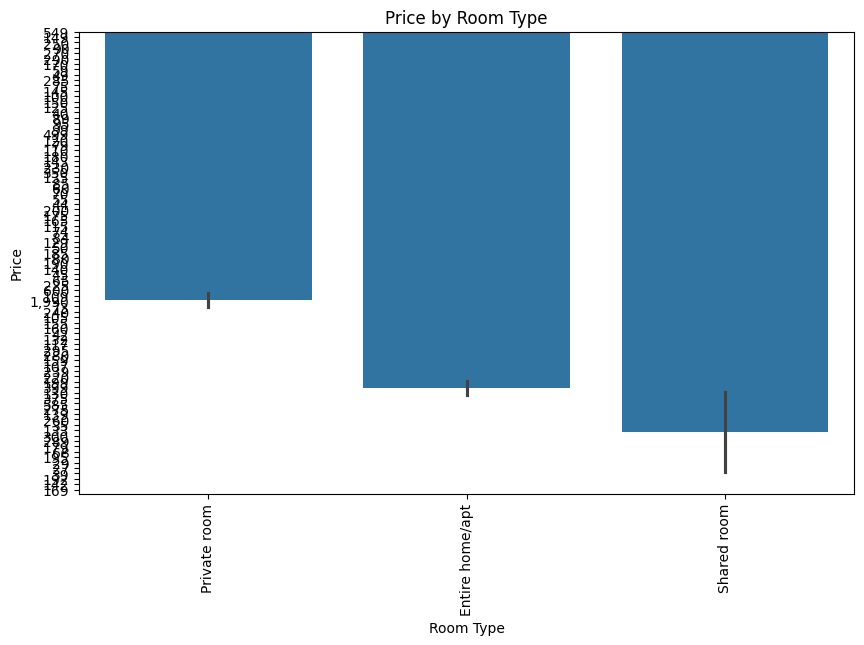

In [7]:
# Clean the data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Perform EDA
print(df.describe())
print(df.info())

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Prices')
plt.show()


# make a bargraph for price by neighbourhood
plt.figure(figsize=(10, 6))
sns.barplot(x='Room Type', y='Price', data=df)
plt.title('Price by Room Type')
plt.xticks(rotation=90)
plt.show()

# 2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [8]:
# Remove columns with string values that cannot be converted to float
df.drop(columns=['Host Since', 'Name'], inplace=True)

# Transform categorical variables using one-hot encoding
categorical_columns = ['Neighbourhood ', 'Property Type', 'Room Type', 'Zipcode']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the transformed dataframe
print(df_encoded.head())

    Host Id  Review Scores Rating (bin)  Beds  Number of Records  \
0   5162530                         NaN   1.0                  1   
1  33134899                         NaN   1.0                  1   
2  39608626                         NaN   1.0                  1   
3       500                         NaN   3.0                  1   
4       500                        95.0   3.0                  1   

   Number Of Reviews Price  Review Scores Rating  Neighbourhood _Bronx  \
0                  0   145                   NaN                 False   
1                  1    37                   NaN                 False   
2                  1    28                   NaN                 False   
3                  0   199                   NaN                 False   
4                 39   549                  96.0                 False   

   Neighbourhood _Brooklyn  Neighbourhood _Manhattan  ...  Zipcode_11433.0  \
0                     True                     False  ...           

# 3. Implement an ~80/~20 train-test split. Put the test data aside

In [9]:
# Define features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(24382, 10) (6096, 10)
(24382,) (6096,)


# 4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [12]:
# Remove columns with string values that cannot be converted to float
df.drop(columns=['Host Since', 'Name'], inplace=True)

# Transform categorical variables using one-hot encoding
categorical_columns = ['Neighbourhood ', 'Property Type', 'Room Type', 'Zipcode']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Define features and target variable
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Remove the string values from y
y = y.str.replace('$', '')
y = y.str.replace(',', '')
y = y.astype(float)
X = X.select_dtypes(exclude=['object'])

# Check for and handle missing values
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate metrics
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {train_rmse}, Train R^2: {train_r2}')
print(f'Test RMSE: {test_rmse}, Test R^2: {test_r2}')

Train RMSE: 172.1629326864563, Train R^2: 0.22895554534782725
Test RMSE: 180.072572901449, Test R^2: 0.22453551442827058


# 5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?

In [15]:
# Remove columns with string values that cannot be converted to float
df.drop(columns=['Host Since', 'Name'], inplace=True)

# Transform categorical variables using one-hot encoding
categorical_columns = ['Neighbourhood ', 'Property Type', 'Room Type', 'Zipcode']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Define features and target variable
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Remove the string values from y
y = y.str.replace('$', '')
y = y.str.replace(',', '')
y = y.astype(float)
X = X.select_dtypes(exclude=['object'])

# Check for and handle missing values
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Ensure all data types are numeric
X = X.apply(pd.to_numeric)
y = pd.to_numeric(y)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Partial correlation plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# 6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [ ]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Build and fit the model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict and calculate metrics
y_train_pred_poly = model_poly.predict(X_train_poly)
y_test_pred_poly = model_poly.predict(X_test_poly)

train_rmse_poly = mean_squared_error(y_train, y_train_pred_poly, squared=False)
test_rmse_poly = mean_squared_error(y_test, y_test_pred_poly, squared=False)
train_r2_poly = r2_score(y_train, y_train_pred_poly)
test_r2_poly = r2_score(y_test, y_test_pred_poly)

print(f'Train RMSE (Poly): {train_rmse_poly}, Train R^2 (Poly): {train_r2_poly}')
print(f'Test RMSE (Poly): {test_rmse_poly}, Test R^2 (Poly): {test_r2_poly}')

# 7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?

In [ ]:
# Summarize results
print("Summary of Results:")
print(f"Simple Model - Train RMSE: {train_rmse}, Train R^2: {train_r2}")
print(f"Simple Model - Test RMSE: {test_rmse}, Test R^2: {test_r2}")
print(f"Complex Model - Train RMSE: {train_rmse_poly}, Train R^2: {train_r2_poly}")
print(f"Complex Model - Test RMSE: {test_rmse_poly}, Test R^2: {test_r2_poly}")

# Discuss overfitting and underfitting
if train_rmse_poly < train_rmse and test_rmse_poly > test_rmse:
    print("The complex model may be overfitting.")
elif train_rmse_poly > train_rmse and test_rmse_poly < test_rmse:
    print("The complex model may be underfitting.")
else:
    print("The complex model is performing better than the simple model.")

# 8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [17]:
# Build and fit the Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train)

# Predict and calculate metrics
y_train_pred_lasso = lasso.predict(X_train_poly)
y_test_pred_lasso = lasso.predict(X_test_poly)

train_rmse_lasso = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
test_rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f'Train RMSE (Lasso): {train_rmse_lasso}, Train R^2 (Lasso): {train_r2_lasso}')
print(f'Test RMSE (Lasso): {test_rmse_lasso}, Test R^2 (Lasso): {test_r2_lasso}')

# Select most predictive features
print("Selected Features by Lasso:")
print(lasso.coef_)

NameError: name 'X_train_poly' is not defined